<a href="https://colab.research.google.com/github/Thealansan/Actividad4/blob/main/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [205]:
#Carga desde un archivo .csv sin indice
Retailer= pd.read_excel('microretailer_mit_lift_lab_actualizado.xlsx')

In [ ]:
#Verificamos información del Dataframe
Retailer.info()

In [ ]:
#Creamos copia del dataframe
data1=Retailer.copy()
data1

**PREPROCESAMIENTO DE DATOS**

**Valores nulos**

In [ ]:
#Identificar valores nulos por columna
valores_nulos=data1.isnull().sum()
valores_nulos

In [209]:
#Realizamos una copia del dataframe
data2=data1.copy()

In [ ]:
#Utilizamos un metodo con el que sustituimos los valores nulos que esten por detras de valores no nulos por ese mismo valor
data2= data1.fillna(method="bfill")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Debido a que todavia nos quedan unos cuantos valores nulos en el dataframe, utilizamos el metodo "ffill" para cambiar los valores nulos que esten delante de un valore no nulo para cambiarlo por el mismo valor
data3= data2.fillna(method='ffill')
data3

In [ ]:
#Corroboramos valores nulos
valores_nulos=data3.isnull().sum()
valores_nulos

In [ ]:
#En caso de que resten unos cuantos valores nulos en el dataframe, utilizamos el metodo de cambiar los valores nulos por un string en concreto para seguridad
data4= data3.fillna('no valido')
data4

**Outliers**

In [215]:
#Creamos otra copia del dataframe
data5=data4.copy()

In [ ]:
#Realizamos un filtro por filas donde se incluyan unicamente los valores cuantitativos
cuantitativas=data5.iloc[:,[13,14,16,21,22,29,31,33,42,49,51,56,57,58,59,60,78,90]] #filas no consecutivas
cuantitativas

In [ ]:
#Realizamos un filtro por filas donde se incluyan unicamente los valores cualitativas
cualitativas=data2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,15,17,18,19,20,23,24,25,26,27,28,30,32,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,52,53,54,55,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105]] #filas no consecutivas
cualitativas

In [ ]:
#Corroboramos valores nulos
valores_nulos=cuantitativas.isnull().sum()
valores_nulos

In [ ]:
#Aplicanmos desviación estandar para encontrar valores extremos
y=cuantitativas
Limite_Superior= y.mean() +3*y.std()
Limite_Inferior= y.mean() -3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [ ]:
#Encontramos Outliers del Dataframe
outliers= cuantitativas[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

In [ ]:
#Obtenemos datos limpios
data5= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data5

In [ ]:
#Revisamos valores atípicos (nulos) del dataframe4
valores_nulos=data5.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data5.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

In [ ]:
#Unimos las columnas cuantitativas y cualitativas en un mismo dataframe
Datos_limpios = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios

In [226]:
#Convertir Dataframe a CSV
Datos_limpios.to_csv("Datos_limpios_Micro_retailer_actualizado.csv")

In [227]:
#descargar archivo filtrado en csv
from google.colab import files

files.download("Datos_limpios_Micro_retailer_actualizado.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**ACTIVIDAD 4**

**Regresión lineal**

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [229]:
#Carga desde un archivo .csv sin indice
df= pd.read_csv('Datos_limpios_Micro_retailer_actualizado.csv')

1

In [ ]:
#Se grafican mapas de dispersion de las 3 variables: '97_number_of_customers_in_store', '2_current_permanent_employees' y '145_number_direct_competitors'
from turtle import color

sns.scatterplot(x='103_number_own_fridges', y='268_number_fridges', color='blue', data=df)
sns.scatterplot(x='172_supplier_frequency', y='268_number_fridges', color='red', data=df)
sns.scatterplot(x='145_number_direct_competitors', y='268_number_fridges', color='yellow', data=df)

In [231]:
#Declaramos las variables dependientes e independientes para la regresión lineal.
#Vars_Indep= df[['alcohol', 'speeding', 'no_previous']]
Vars_Indep= df[['103_number_own_fridges', '172_supplier_frequency', '145_number_direct_competitors']]
Var_Dep= df['268_number_fridges']

In [232]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [233]:
#Verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [234]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [235]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['103_number_own_fridges', '172_supplier_frequency',
        '145_number_direct_competitors'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.07666211, 0.08302529, 0.01647015]),
 '_residues': 993.3450640597509,
 'rank_': 3,
 'singular_': array([60.18449373, 44.29825716, 29.12940366]),
 'intercept_': 0.9549294957397705}

In [236]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R^2 Determinación
model.score(Vars_Indep,Var_Dep)

0.02056001571711341

In [237]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous' 
y_pred= model.predict(X=df[['103_number_own_fridges', '172_supplier_frequency', '145_number_direct_competitors']])
y_pred

array([1.43331716, 1.50930473, 1.50930473, 1.50930473, 1.56006427,
       1.56006427, 1.56006427, 1.56006427, 1.56006427, 1.05442494,
       1.03795479, 1.20333082, 1.18686068, 1.1475572 , 1.46251367,
       1.05442494, 1.35291126, 1.1475572 , 1.29646309, 1.24705264,
       1.1146169 , 1.19696765, 1.20774916, 1.25715961, 1.24068946,
       1.32304021, 1.36234369, 1.23058249, 1.24705264, 1.36369277,
       1.84844362, 1.24068946, 1.17039053, 1.17039053, 1.17039053,
       1.7717815 , 1.7717815 , 1.7717815 , 1.59584883, 1.59584883,
       1.4377355 , 1.51065382, 1.42321019, 1.16402735, 1.16402735,
       1.16402735, 1.16402735, 1.13108705, 1.27362976, 1.27362976,
       1.30657006, 1.30657006, 1.30657006, 1.30657006, 1.30657006,
       1.30657006, 1.30657006, 1.30657006, 1.30657006, 1.30657006,
       1.30657006, 1.27362976, 1.19696765, 1.2463781 , 1.1146169 ,
       1.1804975 , 1.39528398, 1.21411234, 1.62400003, 1.73929107,
       1.67408502, 1.59105973, 1.69055517, 1.69055517, 1.69055

In [238]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,Unnamed: 0,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,...,272_card_days_receive_money.1,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,1.433317,0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),19.043965,-98.201379,Mini súper 7 hermanos,...,0.0,1.0,1.0,20.0,2.0,4.0,10.0,3.0,2.0,10.0
1,1.509305,1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),19.043975,-98.201696,Super papas Lulu,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
2,1.509305,2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),19.043300,-98.196447,Arte Paquistán,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
3,1.509305,3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),19.040570,-98.197072,El vestir,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
4,1.560064,4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),19.043674,-98.201134,Antojitos Tony,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,3.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1.605731,325,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),19.043188,-98.194174,Xuti Galería,...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
326,1.605731,326,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
327,1.605731,327,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
328,1.605731,328,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0


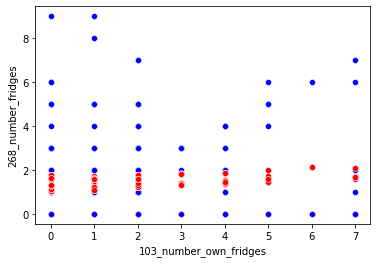

In [239]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '103_number_own_fridges', y= '268_number_fridges', color= 'blue', data=df)
sns.scatterplot(x= '103_number_own_fridges', y= 'Predicciones', color= 'red', data=df)

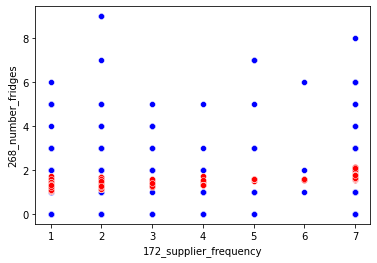

In [240]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '172_supplier_frequency', y= '268_number_fridges', color= 'blue', data=df)
sns.scatterplot(x= '172_supplier_frequency', y= 'Predicciones', color= 'red', data=df)

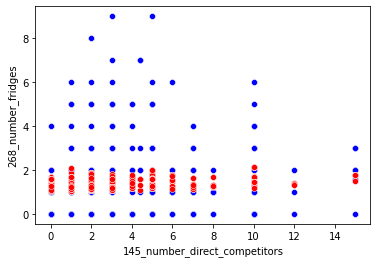

In [241]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '145_number_direct_competitors', y= '268_number_fridges', color= 'blue', data=df)
sns.scatterplot(x= '145_number_direct_competitors', y= 'Predicciones', color= 'red', data=df)

In [242]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.02056001571711341

In [243]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.14338764143786387

2


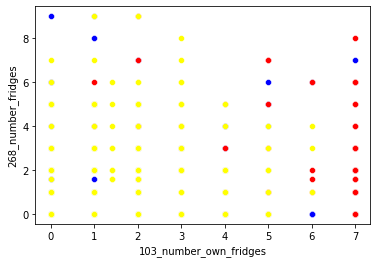

In [244]:
#Se grafican mapas de dispersion de las 3 variables: '97_number_of_customers_in_store', '2_current_permanent_employees' y '145_number_direct_competitors'
from turtle import color

sns.scatterplot(x='103_number_own_fridges', y='268_number_fridges', color='blue', data=df)
sns.scatterplot(x='172_supplier_frequency', y='268_number_fridges', color='red', data=df)
sns.scatterplot(x='97_number_of_customers_in_store', y='268_number_fridges', color='yellow', data=df)

In [245]:
#Declaramos las variables dependientes e independientes para la regresión lineal.
#Vars_Indep= df[['alcohol', 'speeding', 'no_previous']]
Vars_Indep= df[['103_number_own_fridges', '172_supplier_frequency', '97_number_of_customers_in_store']]
Var_Dep= df['268_number_fridges']

In [246]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [247]:
#Verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [248]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [249]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['103_number_own_fridges', '172_supplier_frequency',
        '97_number_of_customers_in_store'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.04189845, 0.08488881, 0.34049737]),
 '_residues': 925.5366344398592,
 'rank_': 3,
 'singular_': array([44.52697764, 29.61376095, 24.01378836]),
 'intercept_': 0.6646590695268888}

In [250]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R^2 Determinación
model.score(Vars_Indep,Var_Dep)

0.08741924685852775

In [251]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous' 
y_pred= model.predict(X=df[['103_number_own_fridges', '172_supplier_frequency', '97_number_of_customers_in_store']])
y_pred

array([1.3006294 , 1.5981364 , 1.5981364 , 1.25763903, 2.10841138,
       1.76791402, 1.08691929, 2.10841138, 3.12990348, 1.09004525,
       1.09004525, 1.17493406, 1.17493406, 0.79144633, 1.04611276,
       0.74954788, 1.68520905, 0.79144633, 0.87633514, 1.55732987,
       0.79144633, 1.13194369, 0.83334477, 0.83334477, 0.83334477,
       1.85483687, 1.89782724, 0.87633514, 1.2168325 , 1.04611276,
       1.8612724 , 1.5143395 , 1.85592879, 1.51543142, 1.51543142,
       1.34267764, 1.68317501, 1.68317501, 1.17290002, 1.51339738,
       0.95904011, 2.10841138, 1.68411713, 1.13194369, 0.79144633,
       1.81293842, 0.79144633, 1.47244106, 0.83334477, 0.83334477,
       1.17384214, 1.17384214, 1.17384214, 2.19533424, 1.5143395 ,
       0.83334477, 2.5358316 , 1.31004108, 0.83334477, 0.83334477,
       0.83334477, 1.17384214, 1.47244106, 1.81293842, 0.79144633,
       1.47244106, 0.87633514, 2.91931933, 1.042837  , 1.38333437,
       1.12772581, 1.042837  , 1.46822318, 2.48971528, 1.12772

In [252]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Predicciones2', y_pred)
df

,Predicciones2,Predicciones,Unnamed: 0,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,...,272_card_days_receive_money.1,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,1.300629,1.433317,0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),19.043965,-98.201379,...,0.0,1.0,1.0,20.0,2.0,4.0,10.0,3.0,2.0,10.0
1,1.598136,1.509305,1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),19.043975,-98.201696,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
2,1.598136,1.509305,2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),19.043300,-98.196447,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
3,1.257639,1.509305,3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),19.040570,-98.197072,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
4,2.108411,1.560064,4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),19.043674,-98.201134,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,3.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1.172900,1.605731,325,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),19.043188,-98.194174,...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
326,1.513397,1.605731,326,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
327,2.194392,1.605731,327,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
328,1.172900,1.605731,328,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0


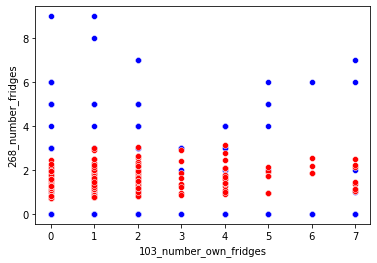

In [253]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '103_number_own_fridges', y= '268_number_fridges', color= 'blue', data=df)
sns.scatterplot(x= '103_number_own_fridges', y= 'Predicciones2', color= 'red', data=df)

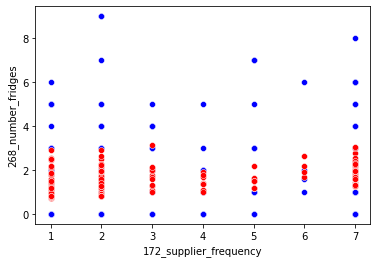

In [254]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '172_supplier_frequency', y= '268_number_fridges', color= 'blue', data=df)
sns.scatterplot(x= '172_supplier_frequency', y= 'Predicciones2', color= 'red', data=df)

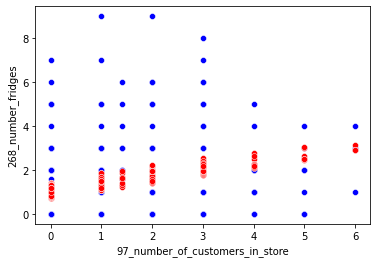

In [255]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '97_number_of_customers_in_store', y= '268_number_fridges', color= 'blue', data=df)
sns.scatterplot(x= '97_number_of_customers_in_store', y= 'Predicciones2', color= 'red', data=df)

In [256]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.08741924685852775

In [257]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.29566745992504445

3

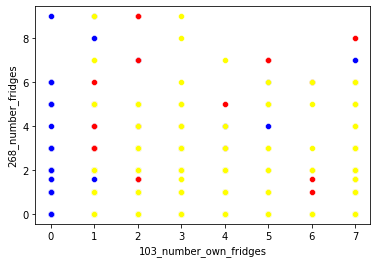

In [258]:
#Se grafican mapas de dispersion de las 3 variables: '24_burnout', '2_current_permanent_employees' y '145_number_direct_competitors'
from turtle import color

sns.scatterplot(x='103_number_own_fridges', y='268_number_fridges', color='blue', data=df)
sns.scatterplot(x='172_supplier_frequency', y='268_number_fridges', color='red', data=df)
sns.scatterplot(x='24_burnout', y='268_number_fridges', color='yellow', data=df)

In [259]:
#Declaramos las variables dependientes e independientes para la regresión lineal.
#Vars_Indep= df[['alcohol', 'speeding', 'no_previous']]
Vars_Indep= df[['103_number_own_fridges', '172_supplier_frequency', '24_burnout']]
Var_Dep= df['268_number_fridges']

In [260]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [261]:
#Verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [262]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [263]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['103_number_own_fridges', '172_supplier_frequency', '24_burnout'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.07430623, 0.08298397, 0.0105224 ]),
 '_residues': 994.1743209964635,
 'rank_': 3,
 'singular_': array([45.94832433, 34.33752723, 29.16501048]),
 'intercept_': 0.9844467725366504}

In [264]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R^2 Determinación
model.score(Vars_Indep,Var_Dep)

0.019742366915657894

In [265]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous' 
y_pred= model.predict(X=df[['103_number_own_fridges', '172_supplier_frequency', '24_burnout']])
y_pred

array([1.39437821, 1.39622287, 1.39622287, 1.39622287, 1.56219081,
       1.56219081, 1.56219081, 1.56219081, 1.56219081, 1.14108754,
       1.14108754, 1.2240715 , 1.19250431, 1.18382657, 1.43277848,
       1.10952034, 1.35847224, 1.18382657, 1.26681054, 1.23524334,
       1.18382657, 1.18382657, 1.25813281, 1.25813281, 1.25813281,
       1.22656561, 1.23524334, 1.23524334, 1.23524334, 1.41173368,
       1.80929805, 1.2897    , 1.2240715 , 1.2240715 , 1.2240715 ,
       1.72446942, 1.72446942, 1.72446942, 1.55850148, 1.55850148,
       1.44948431, 1.60428041, 1.42410074, 1.18382657, 1.18382657,
       1.18382657, 1.18382657, 1.18382657, 1.25813281, 1.25813281,
       1.2897    , 1.2897    , 1.2897    , 1.2897    , 1.2897    ,
       1.2897    , 1.2897    , 1.2897    , 1.2897    , 1.2897    ,
       1.23708801, 1.23708801, 1.16278177, 1.16278177, 1.16278177,
       1.16278177, 1.24576574, 1.24576574, 1.60861917, 1.62966397,
       1.71264794, 1.62966397, 1.71264794, 1.71264794, 1.71264

In [266]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Predicciones3', y_pred)
df

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,...,272_card_days_receive_money.1,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,1.394378,1.300629,1.433317,0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),19.043965,...,0.0,1.0,1.0,20.0,2.0,4.0,10.0,3.0,2.0,10.0
1,1.396223,1.598136,1.509305,1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),19.043975,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
2,1.396223,1.598136,1.509305,2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),19.043300,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
3,1.396223,1.257639,1.509305,3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),19.040570,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
4,1.562191,2.108411,1.560064,4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),19.043674,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,3.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1.621636,1.172900,1.605731,325,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),19.043188,...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
326,1.621636,1.513397,1.605731,326,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
327,1.621636,2.194392,1.605731,327,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
328,1.621636,1.172900,1.605731,328,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,...,1.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0


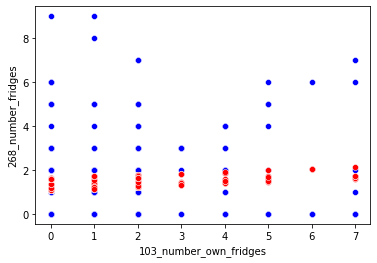

In [267]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '103_number_own_fridges', y= '268_number_fridges', color= 'blue', data=df)
sns.scatterplot(x= '103_number_own_fridges', y= 'Predicciones3', color= 'red', data=df)

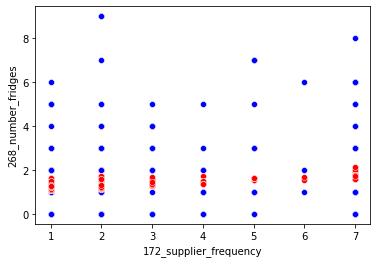

In [268]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '172_supplier_frequency', y= '268_number_fridges', color= 'blue', data=df)
sns.scatterplot(x= '172_supplier_frequency', y= 'Predicciones3', color= 'red', data=df)

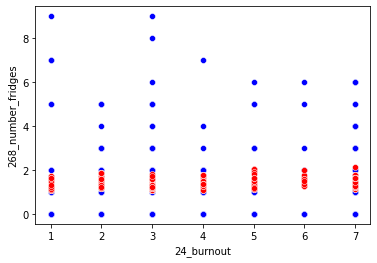

In [269]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '24_burnout', y= '268_number_fridges', color= 'blue', data=df)
sns.scatterplot(x= '24_burnout', y= 'Predicciones3', color= 'red', data=df)

In [270]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.019742366915657894

In [271]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.14050753330571958

**Regresión logística**

In [272]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving Datos_limpios_Micro_retailer_actualizado.csv to Datos_limpios_Micro_retailer_actualizado (7).csv


{'Datos_limpios_Micro_retailer_actualizado.csv': b',_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,19_tax_id,310_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,30_paym

In [273]:
#Carga desde un archivo .csv sin indice
df= pd.read_csv('Datos_limpios_Micro_retailer_actualizado.csv')
df.head(5)

,Unnamed: 0,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,...,272_card_days_receive_money.1,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),19.043965,-98.201379,Mini súper 7 hermanos,1 Photo,...,0.0,1.0,1.0,20.0,2.0,4.0,10.0,3.0,2.0,10.0
1,1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),19.043975,-98.201696,Super papas Lulu,1 Photo,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
2,2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),19.043300,-98.196447,Arte Paquistán,1 Photo,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
3,3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),19.040570,-98.197072,El vestir,1 Photo,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0
4,4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),19.043674,-98.201134,Antojitos Tony,1 Photo,...,0.0,1.0,1.0,7.0,2.0,4.0,0.0,3.0,3.0,30.0


In [274]:
#Rellenamos nulos dentro del condigo 
df=df.fillna(method='ffill')

1

In [275]:
#Declaramos las variables dependientes e independientes para la regresión logística.
Vars_Indep= df[['97_number_of_customers_in_store', '317_home_deliveries', '2_current_permanent_employees']]
Var_Dep= df['186_internet_connection']

In [276]:
#Redefinimos las variables
X= Vars_Indep 
y= Var_Dep

In [277]:
#Dividimos el conjunto de datos en la parte de entrenamiento y pruba:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)

In [278]:
#Se escalan todos los datos 
escalar= StandardScaler()

In [279]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba 
X_train=escalar.fit_transform(X_train)
X_test= escalar.transform(X_test)

In [280]:
#Definimos el algoritmo a utilizar 
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [281]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [282]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'],
      dtype=object)

In [283]:
#Verifico matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[ 0 28]
 [ 0 71]]


In [284]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='binary', pos_label="yes")
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.7171717171717171


In [285]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7171717171717171


In [286]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
1.0


2

In [287]:
#Declaramos las variables dependientes e independientes para la regresión logística.
Vars_Indep= df[['104_how_many_shelves_does_the_micro_retailer_have', '172_supplier_frequency', '103_number_own_fridges']]
Var_Dep= df['20_reviews_finances_monthly']

In [288]:
#Redefinimos las variables
X= Vars_Indep 
y= Var_Dep

In [289]:
#Dividimos el conjunto de datos en la parte de entrenamiento y pruba:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)

In [290]:
#Se escalan todos los datos 
escalar= StandardScaler()

In [291]:
#Para realizar el escalamiento de las variables "A" tanto de entrenamiento como de prueba 
X_train=escalar.fit_transform(X_train)
X_test= escalar.transform(X_test)

In [292]:
#Definimos el algoritmo a utilizar 
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [293]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [294]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'],
      dtype=object)

In [295]:
#Verifico matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[ 0 30]
 [ 0 69]]


In [296]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='binary', pos_label="yes")
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.696969696969697


In [297]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.696969696969697


In [298]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
1.0


3

In [299]:
#Declaramos las variables dependientes e independientes para la regresión logística.
Vars_Indep= df[['97_number_of_customers_in_store', '317_home_deliveries', '2_current_permanent_employees']]
Var_Dep= df['310_burnout']

In [300]:
#Redefinimos las variables
X= Vars_Indep 
y= Var_Dep

In [301]:
#Dividimos el conjunto de datos en la parte de entrenamiento y pruba:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)

In [302]:
#Se escalan todos los datos 
escalar= StandardScaler()

In [303]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba 
X_train=escalar.fit_transform(X_train)
X_test= escalar.transform(X_test)

In [304]:
#Definimos el algoritmo a utilizar 
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [305]:
#Entrenamos el modelo 
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [306]:
#Realiamos una prediccion 
y_pred=algoritmo.predict(X_test)
#y_pred_df = pd.DataFrame(y_pred)
y_pred

array(['no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'],
      dtype=object)

In [307]:
#Verifico matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[24 37]
 [23 15]]


In [308]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='binary', pos_label="yes")
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.28846153846153844


In [309]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.3939393939393939


In [310]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.39473684210526316
